In [54]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

데이터 만들기

In [55]:
df = pd.DataFrame(columns=['x', 'y'])

In [56]:
for i in range(12):
    df.loc[i] = [random.randint(0,20), random.randint(0,20)]

In [76]:
df.head(12)

,x,y,cluster_id
0,10,18,0
1,2,10,2
2,4,8,2
3,5,14,0
4,17,18,1
5,5,19,0
6,12,14,1
7,4,3,2
8,11,11,1
9,16,7,1


데이터를 좌표화 시키기

Text(9.925,0.5,'y')

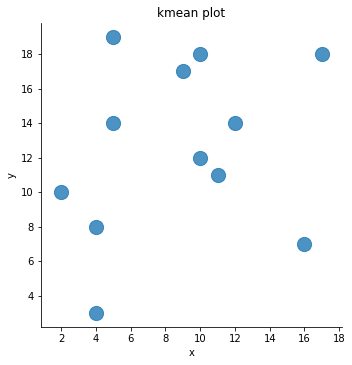

In [77]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 200}) # x-axis, y-axis, data, no line, marker size

plt.title('kmean plot')

plt.xlabel('x')

plt.ylabel('y')

k-mean clustering algorithm

In [78]:
data_points = df.values

In [79]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [80]:
# 각 클러스터에 label 할당해주기
kmeans.labels_

array([1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1])

In [81]:
# 최종 centroid 위치
centers = kmeans.cluster_centers_

In [82]:
df['cluster_id'] = kmeans.labels_

분류결과

In [85]:
df.head(12)

,x,y,cluster_id
0,10,18,1
1,2,10,2
2,4,8,2
3,5,14,1
4,17,18,0
5,5,19,1
6,12,14,0
7,4,3,2
8,11,11,0
9,16,7,0


최종 결과 시각화

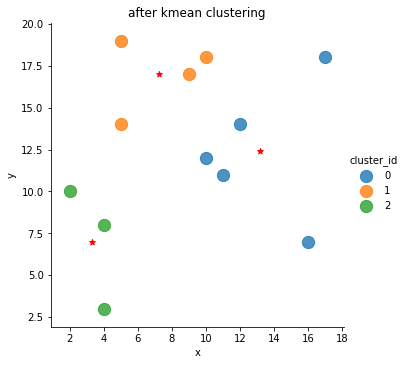

In [86]:
sns.lmplot('x', 'y', data=df, fit_reg=False,  
           scatter_kws={"s": 150}, 
           hue="cluster_id")
plt.title('after kmean clustering')
plt.scatter(centers[:,0], centers[:,1], marker="*", color='r')